Data Set: https://www.kaggle.com/kiva/data-science-for-good-kiva-crowdfunding


I have made loans with Kiva in the past in the hope of helping locals secure the working capital needed to generate a cash flow. But it usually takes years before I even see a repayment of cents. There is a lot of controversy surrounding Kiva and the benefit/harm it does to small communities. 

Kiva has released a data set of their loans, and so I thought it would be interesting to take a look to see how the money is being used/distributed.

Lets start by seeing what kind of data we have.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

pd.options.mode.chained_assignment = None


# Load the data
df = pd.read_csv(r'C:\Users\sun\kiva_loans.csv')

#Preview data
df.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [4]:
#Check the missing data
missing_count = df.isnull().sum()
percent_missing = (missing_count/df.count()*100)
num_unique = df.nunique()
missing_data = pd.concat([missing_count, percent_missing, num_unique], axis=1, keys=['Count', 'Percent', 'Unique'])
missing_data.sort_values(by=['Count'], ascending=False)

# Drop irrelevant data
df = df.drop(['id', 'country_code', 'region', 'tags'], axis = 1)



There are no major gaps in the data, so not much work needed here (Tags isn't something I'm interested in so I dropped it).

It wasn't clear if the loans were reported in USD so need to dig into that and clean up some of the data

Unique Currencies:
 ['PKR' 'INR' 'KES' 'NIO' 'USD' 'TZS' 'PHP' 'PEN' 'XOF' 'LRD' 'VND' 'HNL'
 'MNT' 'COP' 'GTQ' 'TJS' 'BOB' 'YER' 'KHR' 'GHS' 'SLL' 'HTG' 'CLP' 'JOD'
 'UGX' 'BIF' 'IDR' 'GEL' 'UAH' 'EUR' 'ALL' 'CRC' 'XAF' 'TRY' 'AZN' 'DOP'
 'BRL' 'MXN' 'KGS' 'AMD' 'PYG' 'LBP' 'WST' 'ILS' 'RWF' 'ZMW' 'NPR' 'MZN'
 'ZAR' 'BZD' 'SRD' 'NGN' 'VUV' 'XCD' 'MWK' 'LAK' 'MMK' 'ZWD' 'MDL' 'SSP'
 'SBD' 'CNY' 'EGP' 'MGA' 'NAD' 'LSL' 'THB'] 

Currency summary: 
count    671205.000000
mean        842.397107
std        1198.660073
min          25.000000
25%         275.000000
50%         500.000000
75%        1000.000000
max      100000.000000
Name: loan_amount, dtype: float64



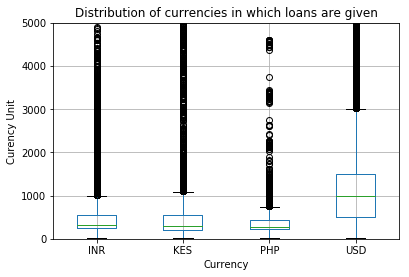

In [5]:
# See what currencies we are dealing with
print('Unique Currencies:\n', df['currency'].unique(), '\n')
print('Currency summary: \n', df['loan_amount'].describe(), '\n', sep='')

# Plot the distribution of select currencies
df_currency_test = df[df['currency'].isin(['INR', 'USD', 'PHP', 'KES'])]
df_currency_test.boxplot(column = 'loan_amount', by='currency') 

plt.title('Distribution of currencies in which loans are given')
plt.suptitle('')
plt.ylabel('Curency Unit')
plt.xlabel('Currency')
axes = plt.gca()
axes.set_ylim([0,5000])

plt.show()

# Clean data
df['use'] = df['use'].str.lower().str.strip('.').str.replace(' his ', ' their ').str.replace(' her ', ' their ')

df['borrower_genders'] = df['borrower_genders'].str.split(',').str[0]
df['borrower_genders'] = df['borrower_genders'].fillna(method='ffill')

Using a sample of four currencies which have substantially different exchange rates, it appears that the distributions of loans amounts are approximately the same. Therefore its reasonable to conclude all values in the data set are reported in USD.

We're already seing some interesting stuff. Looks like there are some larger loans up to \$100,000 which would not be microfinancing. Looking at the Kiva site, they apparently do engage in some larger loans but 75% are under $1000. It will be interesting to look at these larger loans in more detail later.


---------------------------


Lets start to get some general observations now!

Text(0,0.5,'Percent (%)')

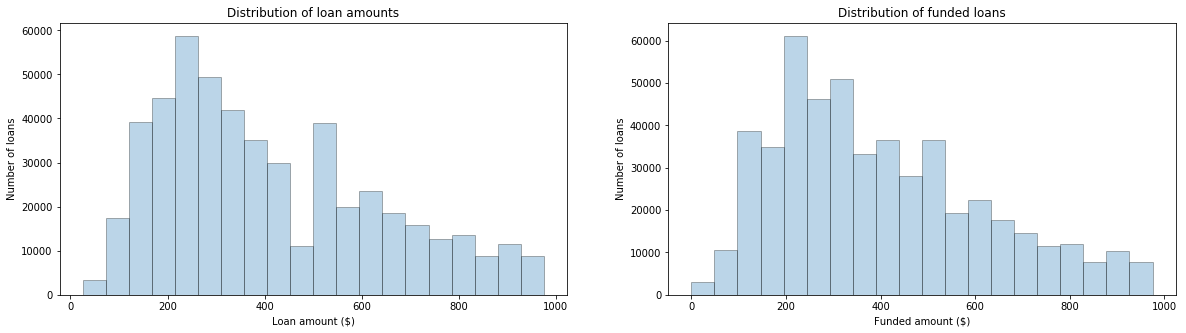

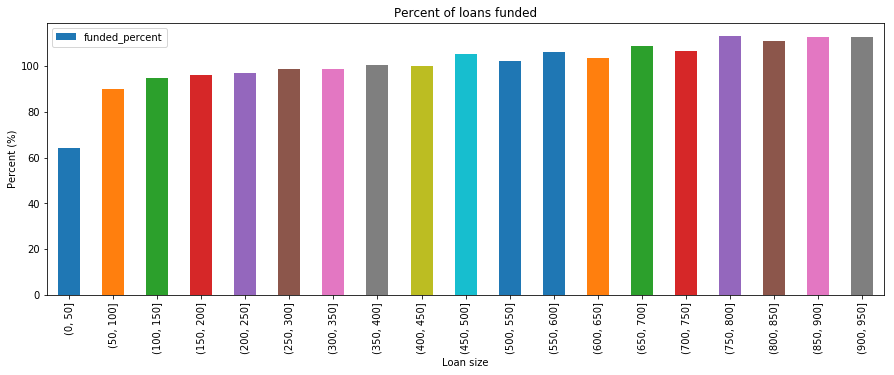

In [29]:
#Chart funded amount and loan amounts
fig = plt.figure(figsize=(20,5))
df_truncated = df[df['loan_amount']<1000] 

plt.subplot(1,2,1)
ax1 = df_truncated['loan_amount'].plot(kind='hist', alpha=0.3, bins=20, edgecolor='k')
plt.title('Distribution of loan amounts')
plt.xlabel('Loan amount ($)')
plt.ylabel('Number of loans')

plt.subplot(1,2,2)
ax2 = df_truncated['funded_amount'].plot(kind='hist', alpha=0.3, bins=20, edgecolor='k')
plt.title('Distribution of funded loans')
plt.xlabel('Funded amount ($)')
plt.ylabel('Number of loans')

#Calculate and chart funded percentage in each bin
df_truncated
df_funding = pd.DataFrame()
df_funding['fund'] = df_truncated['funded_amount'].groupby(pd.cut(df_truncated['funded_amount'], np.arange(0,1000,50))).count()
df_funding['loan'] = df_truncated['loan_amount'].groupby(pd.cut(df_truncated['loan_amount'], np.arange(0,1000,50))).count()
df_funding['funded_percent']= df_funding['loan']/df_funding['fund']*100

df_funding.reset_index().plot.bar(x='funded_amount',y='funded_percent', figsize=(15,5))
plt.title('Percent of loans funded')
plt.xlabel('Loan size')
plt.ylabel('Percent (%)')

######################Bar chart bin values are not comparable


For loans made under \$1000, most are funded to completion, meaning they actually go out to the borrowers. However, almost 40$ of loans made under \$50 don't get funded. Maybe people don't think such small loans are very useful? It suggests that if you want to maximize the changes of your loan getting funded, you should have a bias towards larger loans.

---------------------------

Let's now look at the attributes of the loans


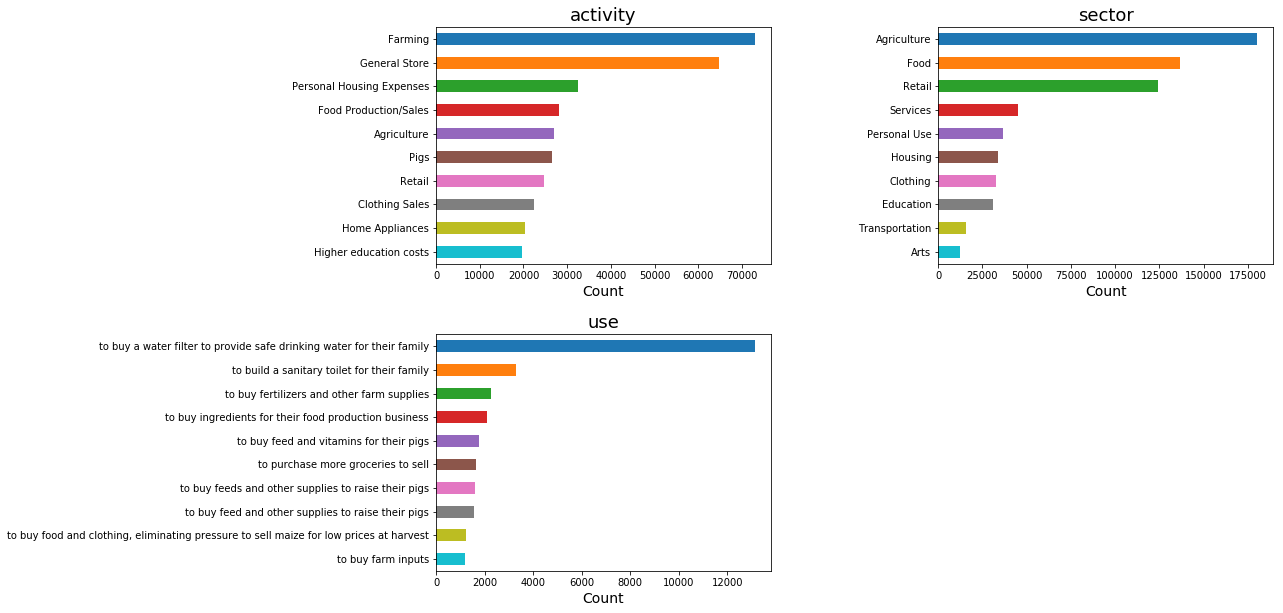

In [16]:
# Plot top 10 in activity, sector, and use
fig = plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.3, wspace=0.5)

cols = df.loc[:, ['activity', 'sector', 'use']]

for i, col in enumerate(cols):
    plt.subplot(2, 2, i+1)
    value = cols[col].value_counts().head(10)
    value.plot(kind='barh')
    plt.title(col, fontsize=18)
    plt.xlabel('Count', fontsize=14)
    plt.gca().invert_yaxis()




Agriculture and farming rank the most popular types ('activity', 'sector') of loans. Communities in lesser developed countries usually rely on sustenance farming, which strongly links agriculture to their survivability. The actual use of loans is predominantly for drinking water. It's unclear whether that use would also fall under an 'Agriculture' type of loan, which would make sense if it was sustenance farming. If not, I would have expected a different distribution in the activity and sector distributions.

-----------------

Loan repayments are very important to look at when evaluating any type of debt system. Without repayments, the ability for investors to achieve returns and reinvest is impaired.

Text(0,0.5,'Frequency')

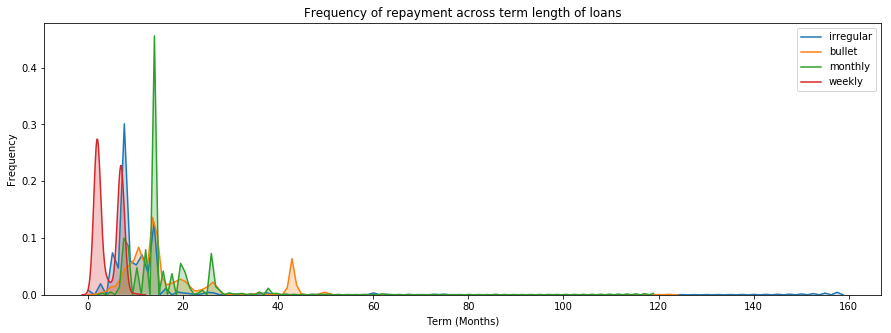

In [17]:
# Plot frequency of repayment by term of loan
fig = plt.figure(figsize=(15,5))

repayment_intervals = df['repayment_interval'].unique()

for intv in repayment_intervals:
    sns.kdeplot(df['term_in_months'][df['repayment_interval'] == intv] ,shade=True, label=intv)
    
plt.title('Frequency of repayment across term length of loans')
plt.xlabel('Term (Months)')
plt.ylabel('Frequency')

##############KDE does not add up to 100%

Shorter term loans (0-12 months) are payed back more frequently on a wekly basis that ranges. longer term loans (>12 months) are mostly paid back monthly. 

female    399903
male      102812
Name: borrower_genders, dtype: int64


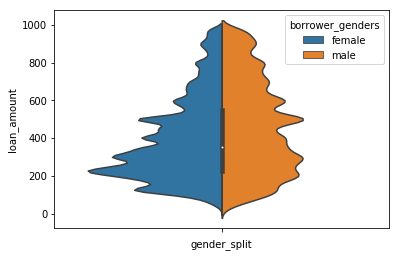

In [30]:
# Plot Genders
df_truncated["gender_split"] = ""
sns.violinplot(y='loan_amount', x='gender_split', hue='borrower_genders', split=True, data = df_truncated)

print(df_truncated['borrower_genders'].value_counts())

There are almost 4X the amount of loans made to females than males. Behaviouraly, studies have shown that females are more risk adverse and have better repayment habbits. Perhaps theis makes them better loan targets. Hoever, the violin plot seems to show denser loan distribution for males in the higher end, while females are getting most of the loans in the \$200 range. 

---------------------

Geographic distribution of loans

Text(0,0.5,'Country')

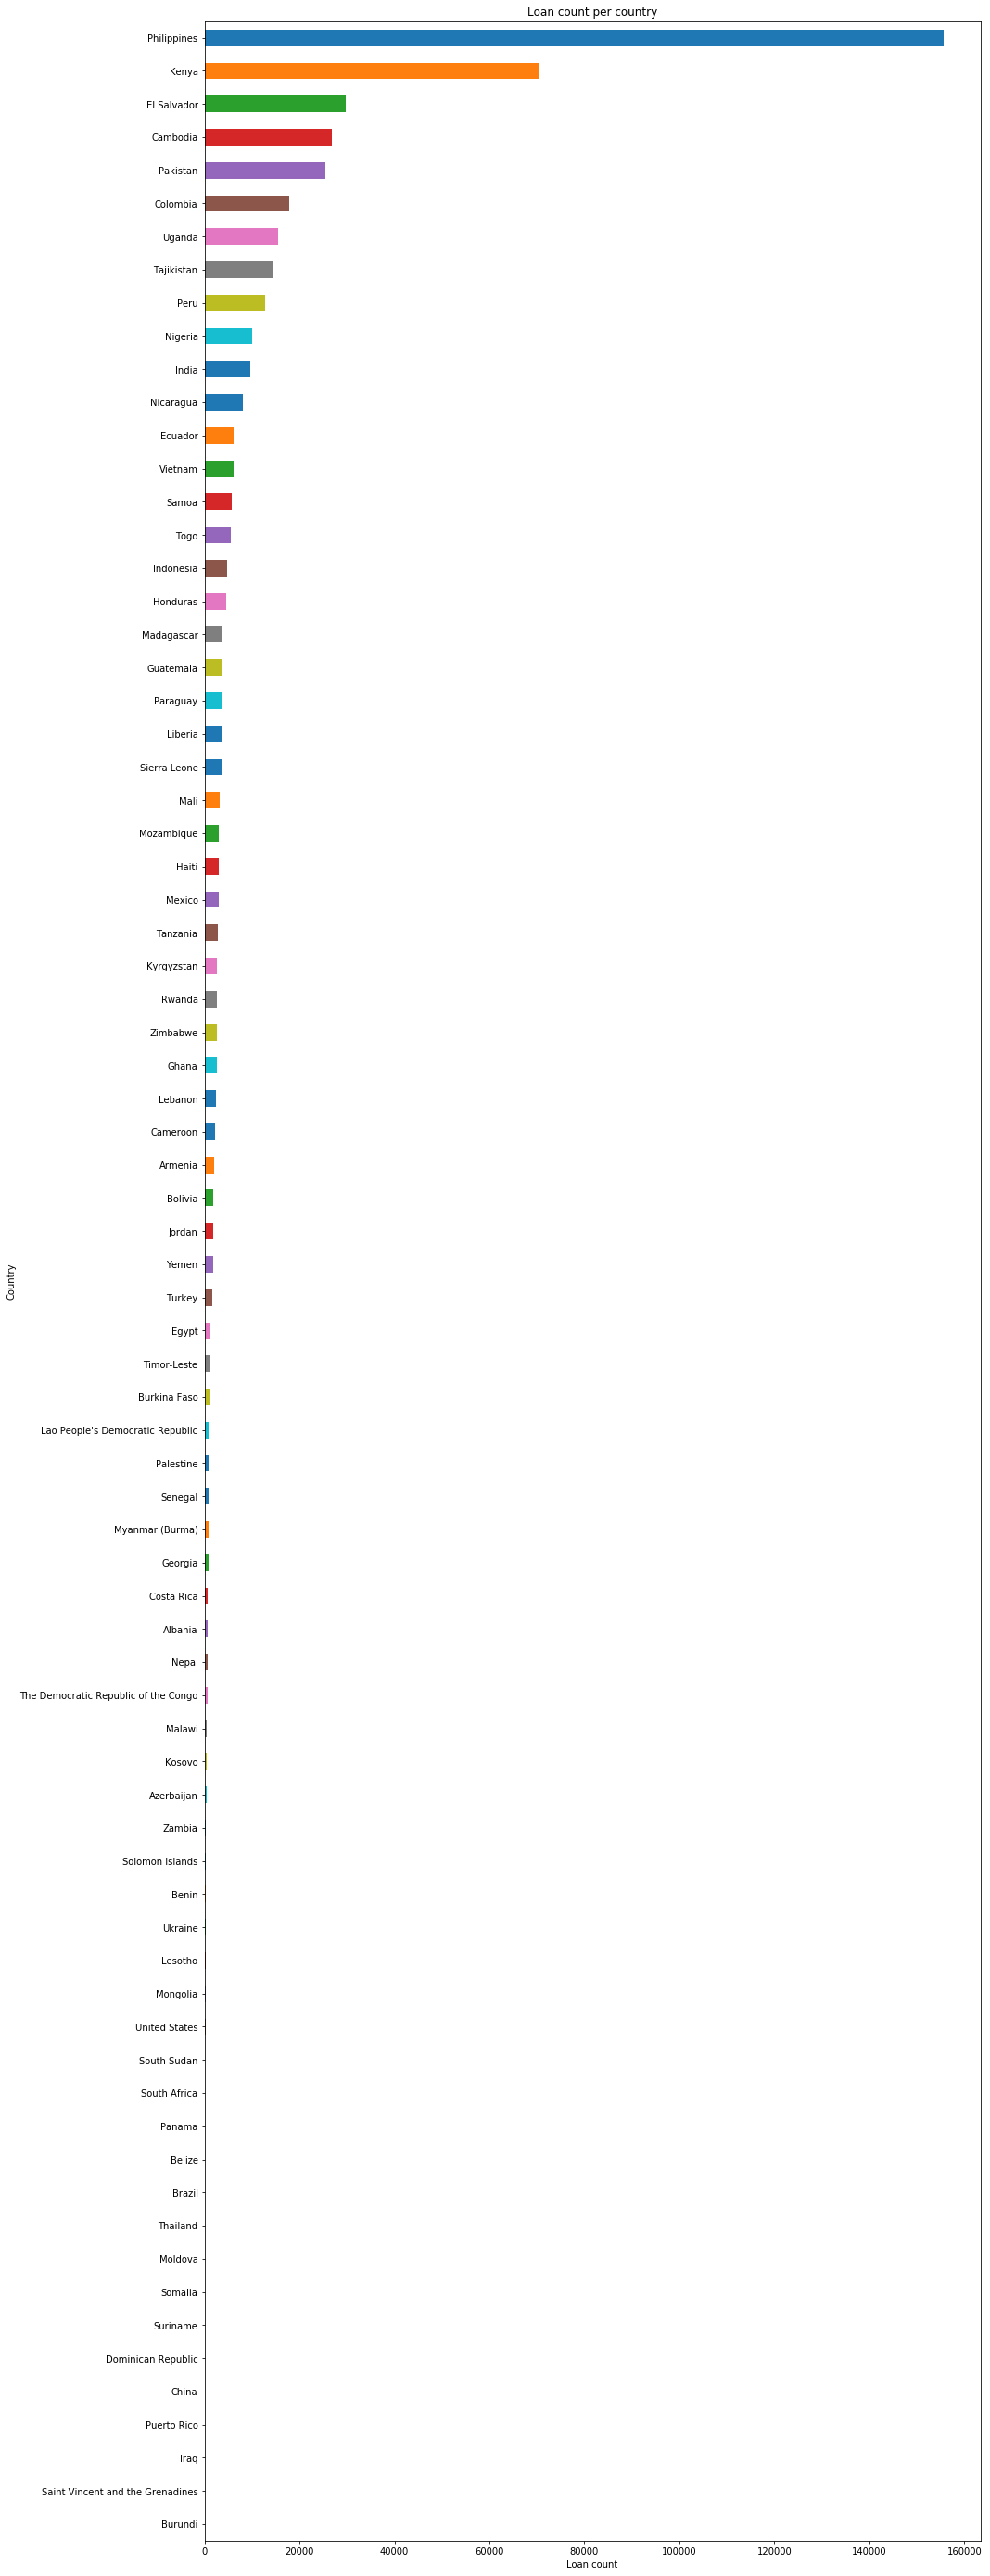

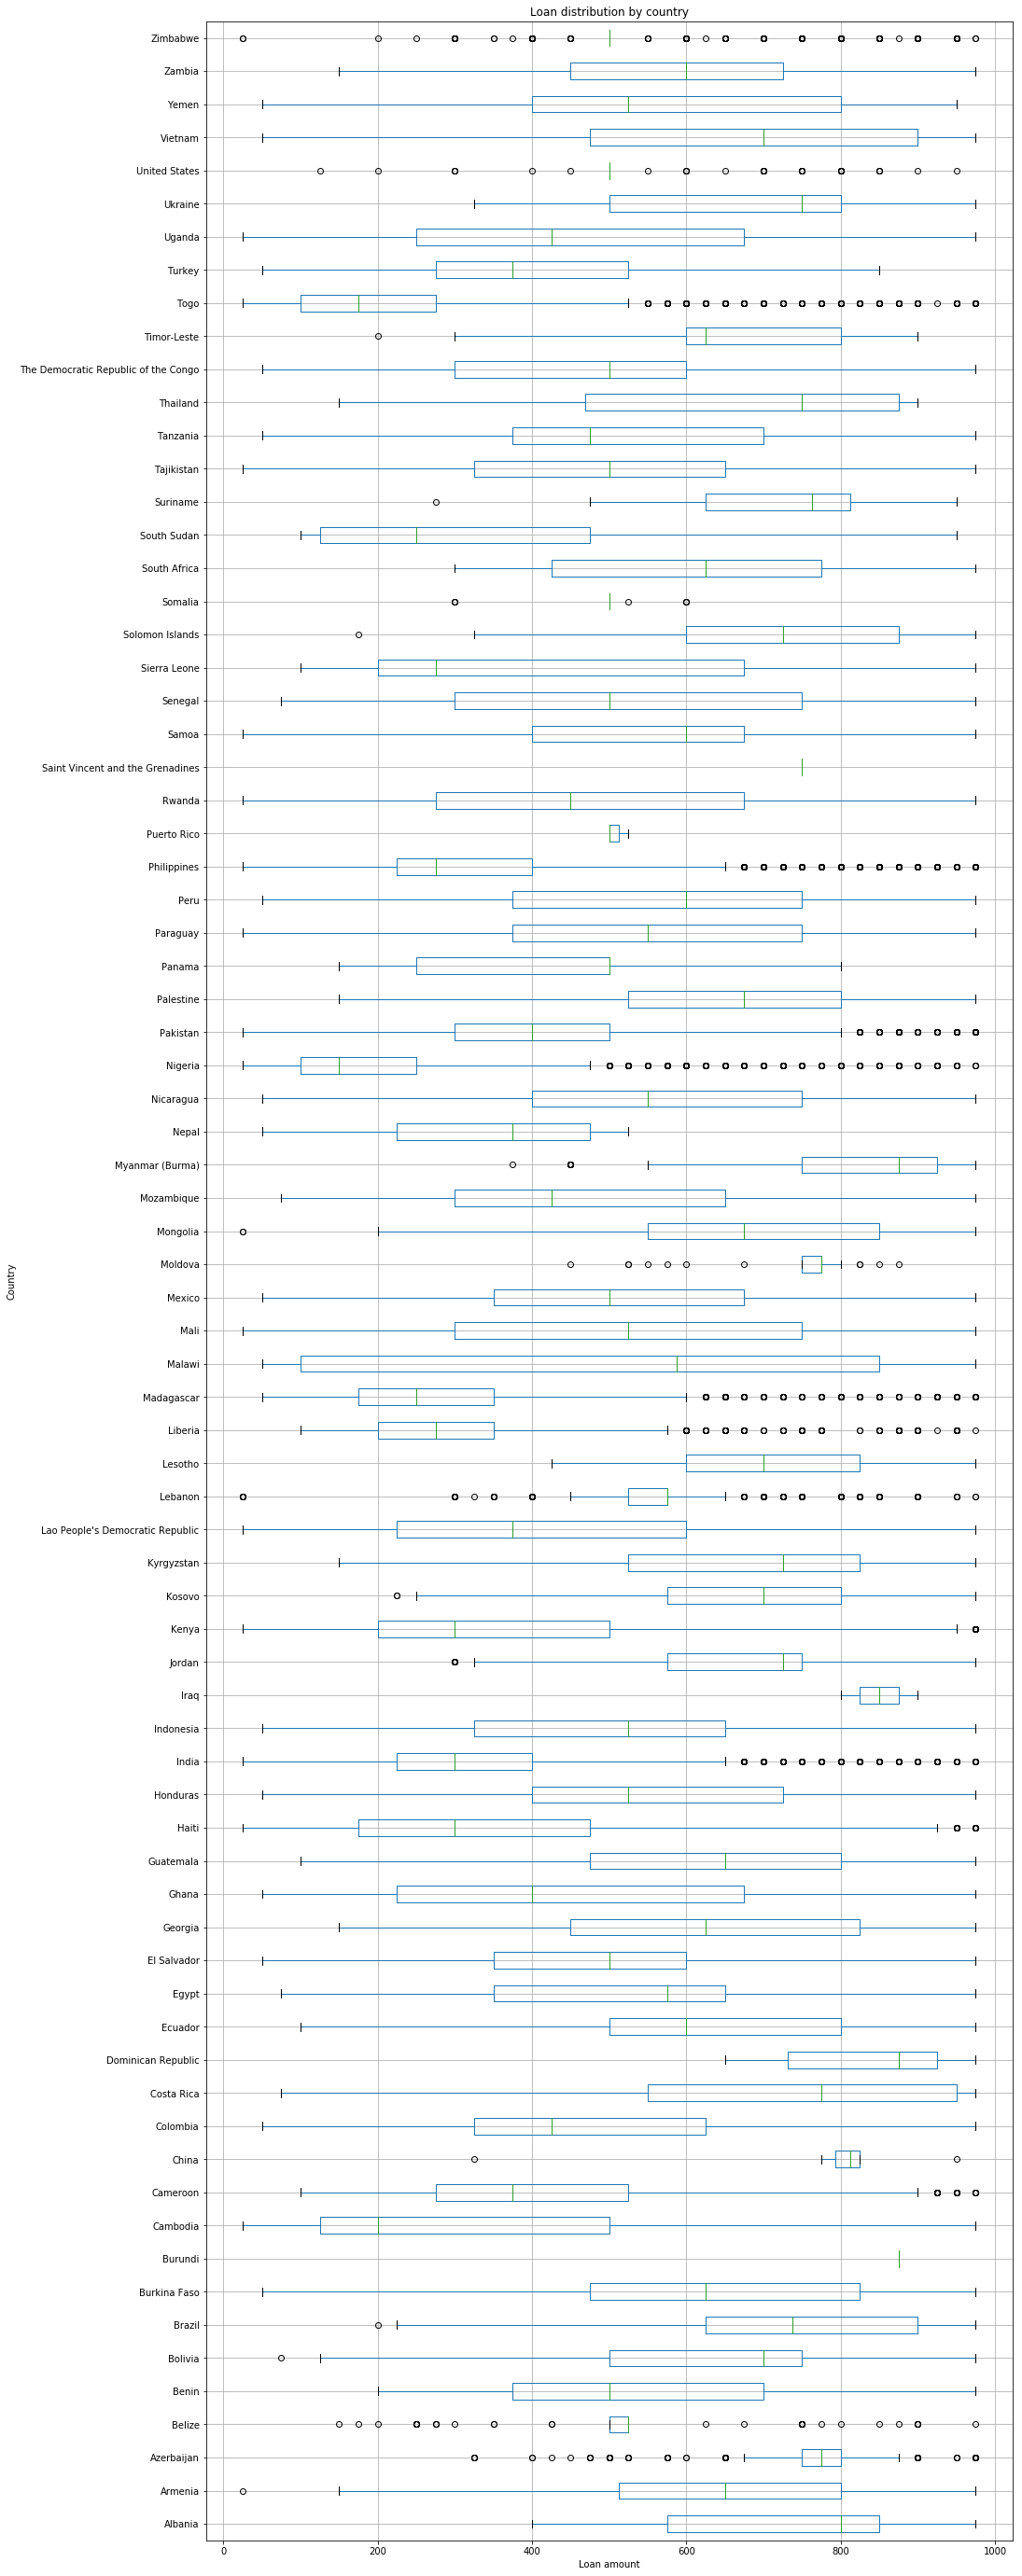

In [31]:
fig = plt.figure(figsize=(15,50))

# Loan count by country
value = df_truncated['country'].value_counts()

value.plot(kind='barh')
plt.title('Loan count per country')
plt.xlabel('Loan count')
plt.ylabel('Country')
plt.gca().invert_yaxis()

# Loan Distribution by country
fig = plt.figure(figsize=(15,50))
ax = fig.gca()
df_truncated.boxplot(column='loan_amount', by='country', vert=False, ax=ax)
plt.suptitle('')
plt.title('Loan distribution by country')
plt.xlabel('Loan amount')
plt.ylabel('Country')

#Gender, Country
#graph borrower, repayment type, lender count, term, country, convert funded time


Phillipines, Kenya, and El Salvador rank as 34th, 69th, and 106th by 2017 nominal GDP. I would have thought countries scoring lower GDP ranks would be more popular, but that isn't necessairly the case. 